In [1]:
from dlsr import *
from tensorflow import keras

helpers.config(True)

In [2]:
# general
image_size = 96
batch_size = 16
epochs = 500

# generator 
gen_n1 = 1e-4
gen_n2 = 1e-5

# discriminator
dis_n1 = 1e-4
dis_n2 = 1e-5

In [3]:
# setup training data
training_data = helpers.get_training_data(
    image_size=image_size, batch_size=batch_size, repeat_count=20, scale=4
)

In [4]:
# instantiate models
discriminator = models.discriminator(image_size=image_size)
generator = keras.models.load_model(
    "./results/saved-models/srres4x.h5",
)
srgan = models.SRGAN(discriminator=discriminator, generator=generator)

# instantiate losses
generator_loss = losses.PerceptualLoss(discriminator=discriminator, image_size=image_size)
discriminator_loss = keras.losses.BinaryCrossentropy(from_logits=False)

# create a history object
history = helpers.History([
    "d_loss",
    "g_loss",
    "val_d_loss",
    "val_g_loss",
    "d_accuracy",
    "g_accuracy",
    "val_d_accuracy",
    "val_g_accuracy",
])

In [5]:
# pass 1
train_gan(
    srgan=srgan,
    training_data=training_data,
    epochs=epochs//2,
    batch_size=batch_size,
    generator_loss_fn=generator_loss,
    generator_n=gen_n1,
    discriminator_loss_fn=discriminator_loss,
    discriminator_n=dis_n1,
    history=history,
)

Epoch 1/250
1000/1000 [==============================] - 148s 132ms/step - d_loss: 0.4870 - g_loss: 0.0847 - g_accuracy: 0.8773 - d_accuracy: 0.7626 - val_d_loss: 0.1940 - val_g_loss: 0.0774 - val_g_accuracy: 0.8550 - val_d_accuracy: 0.9750
Epoch 2/250
1000/1000 [==============================] - 131s 131ms/step - d_loss: 0.4688 - g_loss: 0.0843 - g_accuracy: 0.8682 - d_accuracy: 0.7643 - val_d_loss: 0.4102 - val_g_loss: 0.0539 - val_g_accuracy: 0.8755 - val_d_accuracy: 0.8050
Epoch 3/250
1000/1000 [==============================] - 132s 132ms/step - d_loss: 0.3844 - g_loss: 0.0859 - g_accuracy: 0.8640 - d_accuracy: 0.8218 - val_d_loss: 0.3440 - val_g_loss: 0.0814 - val_g_accuracy: 0.8478 - val_d_accuracy: 0.8200
Epoch 4/250
1000/1000 [==============================] - 131s 131ms/step - d_loss: 0.3607 - g_loss: 0.0846 - g_accuracy: 0.8734 - d_accuracy: 0.8365 - val_d_loss: 0.3394 - val_g_loss: 0.0671 - val_g_accuracy: 0.8753 - val_d_accuracy: 0.8800
Epoch 5/250
1000/1000 [=============

In [6]:
# pass 2
train_gan(
    srgan=srgan,
    training_data=training_data,
    epochs=epochs//2,
    batch_size=batch_size,
    generator_loss_fn=generator_loss,
    generator_n=gen_n2,
    discriminator_loss_fn=discriminator_loss,
    discriminator_n=dis_n2,
    history=history,
)

Epoch 1/250
1000/1000 [==============================] - 135s 129ms/step - d_loss: 0.0831 - g_loss: 0.0743 - g_accuracy: 0.8934 - d_accuracy: 0.9687 - val_d_loss: 0.1009 - val_g_loss: 0.0902 - val_g_accuracy: 0.8632 - val_d_accuracy: 0.9750
Epoch 2/250
1000/1000 [==============================] - 128s 128ms/step - d_loss: 0.0951 - g_loss: 0.0746 - g_accuracy: 0.8930 - d_accuracy: 0.9624 - val_d_loss: 0.0156 - val_g_loss: 0.0712 - val_g_accuracy: 0.8823 - val_d_accuracy: 0.9600
Epoch 3/250
1000/1000 [==============================] - 129s 129ms/step - d_loss: 0.0940 - g_loss: 0.0732 - g_accuracy: 0.8940 - d_accuracy: 0.9638 - val_d_loss: 0.0147 - val_g_loss: 0.0601 - val_g_accuracy: 0.8849 - val_d_accuracy: 0.9750
Epoch 4/250
1000/1000 [==============================] - 128s 128ms/step - d_loss: 0.0924 - g_loss: 0.0743 - g_accuracy: 0.8952 - d_accuracy: 0.9643 - val_d_loss: 0.0029 - val_g_loss: 0.0879 - val_g_accuracy: 0.8703 - val_d_accuracy: 0.9700
Epoch 5/250
1000/1000 [=============

In [7]:
architecture = generator.to_json()
with open("./results/saved-models/srgan4x/architecture.json", "w") as f:
    f.write(architecture)
generator.save_weights("./results/saved-models/srgan4x/generator.h5")

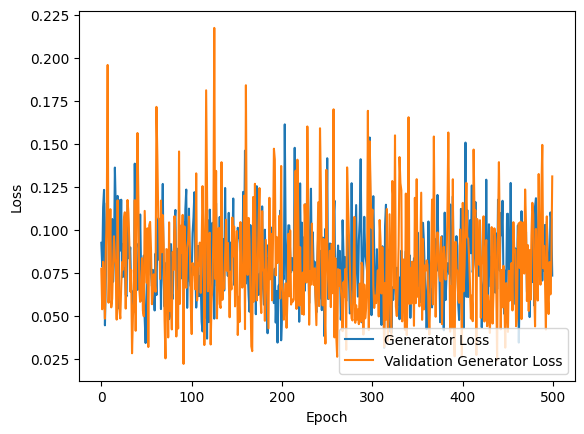

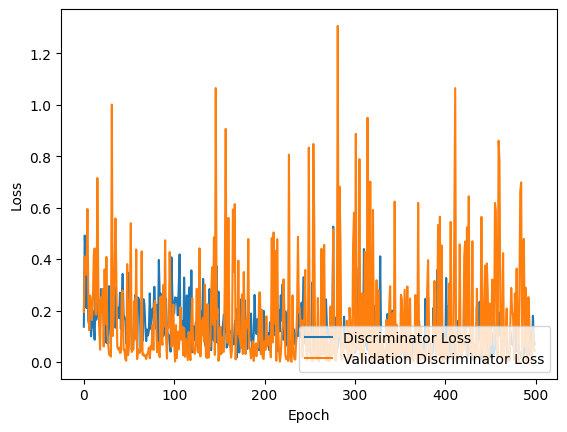

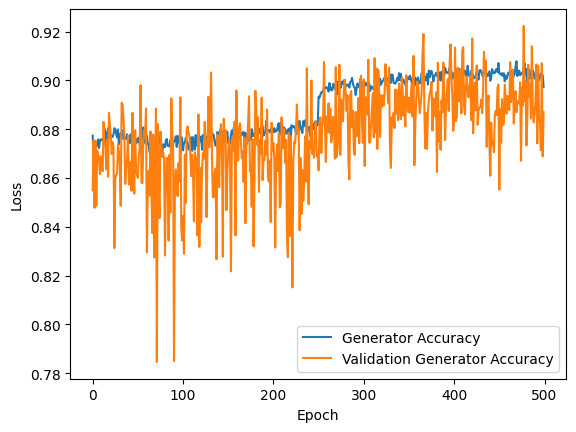

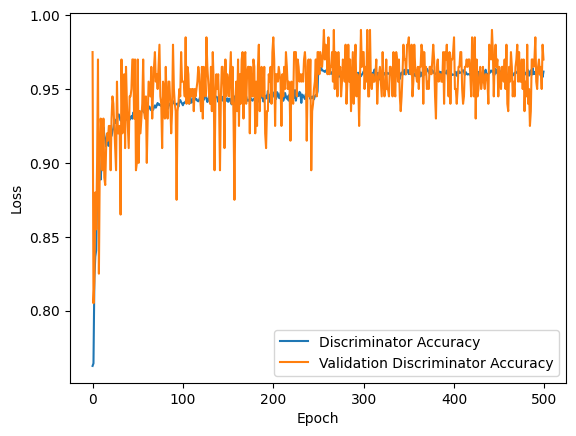

In [8]:
history.plot({
    "g_loss": "Generator Loss",
    "val_g_loss": "Validation Generator Loss"
})
history.plot({
    "d_loss": "Discriminator Loss",
    "val_d_loss": "Validation Discriminator Loss"
})
history.plot({
    "g_accuracy": "Generator Accuracy",
    "val_g_accuracy": "Validation Generator Accuracy"
})
history.plot({
    "d_accuracy": "Discriminator Accuracy",
    "val_d_accuracy": "Validation Discriminator Accuracy"
})